In [ ]:
# Description : This is a sentiment analysis program that parses the tweets fetched from twitter using python 

In [1]:
#import the librabries
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [4]:
# Get the data
log = pd.read_csv('login.csv')

In [5]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [7]:
#Extract 100 tweets from the twitter user

posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = "en", tweet_mode = "extended")

#print the last 5 tweets from the account
print("Show the 5 recent tweets")

for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

Show the 5 recent tweets
No one person can solve climate change on their own. However, if we make breakthroughs in zero-carbon innovations, we can avoid a climate disaster together. Thanks to @Kurz_Gesagt for creating this informative video. https://t.co/aUdXfnpmnL

Happy Birthday, President Carter. You set a great example for all of us, and I am always inspired by your amazing work. https://t.co/fOQjA5Of0R

The College @AdvisingCorps is helping students navigate the challenges of continuing their education after high school. https://t.co/JoWpuUCUwe

Girin Beeharry was an extraordinary leader and good friend. I’m saddened by his death and inspired by his work to improve lives in India and around the world. https://t.co/8qCmPFtO8G

I’m excited about the launch of @CipherClimate by Breakthrough Energy. The first issue includes an important discussion with U.S. Energy Secretary @SecGranholm and new data showing record amounts of cleantech investment. https://t.co/70lVFUWEQ2



In [8]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,No one person can solve climate change on thei...
1,"Happy Birthday, President Carter. You set a gr..."
2,The College @AdvisingCorps is helping students...
3,Girin Beeharry was an extraordinary leader and...
4,I’m excited about the launch of @CipherClimate...


In [9]:
# Clean the text
# Create a funstion to clean the tweets
import re
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @ mentions
  text = re.sub(r'#', '', text) #remove the '#' symbols
  text = re.sub(r'RT[\s]+', '', text) # remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link

  return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,No one person can solve climate change on thei...
1,"Happy Birthday, President Carter. You set a gr..."
2,The College is helping students navigate the ...
3,Girin Beeharry was an extraordinary leader and...
4,I’m excited about the launch of by Breakthrou...
...,...
95,Should you pick your nose?\n\nYou can read an ...
96,The journalist has created a fascinating beat...
97,The persistence of countless Rotarians gives m...
98,I'm almost always interested in books about Am...


In [10]:
#Create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create 2 new columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,No one person can solve climate change on thei...,0.600000,0.400000
1,"Happy Birthday, President Carter. You set a gr...",0.883333,0.733333
2,The College is helping students navigate the ...,0.540000,0.160000
3,Girin Beeharry was an extraordinary leader and...,0.800000,0.516667
4,I’m excited about the launch of by Breakthrou...,0.634470,0.290341
...,...,...,...
95,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000
96,The journalist has created a fascinating beat...,0.783333,0.633333
97,The persistence of countless Rotarians gives m...,0.500000,0.000000
98,I'm almost always interested in books about Am...,0.670000,0.490000


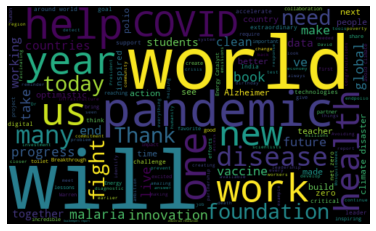

In [19]:
# Plot The Word Cloud
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width  = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Create a funtion to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)    

#show the dataframe

df

,Tweets,Subjectivity,Polarity,Analysis
0,No one person can solve climate change on thei...,0.600000,0.400000,Positive
1,"Happy Birthday, President Carter. You set a gr...",0.883333,0.733333,Positive
2,The College is helping students navigate the ...,0.540000,0.160000,Positive
3,Girin Beeharry was an extraordinary leader and...,0.800000,0.516667,Positive
4,I’m excited about the launch of by Breakthrou...,0.634470,0.290341,Positive
...,...,...,...,...
95,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000,Positive
96,The journalist has created a fascinating beat...,0.783333,0.633333,Positive
97,The persistence of countless Rotarians gives m...,0.500000,0.000000,Neutral
98,I'm almost always interested in books about Am...,0.670000,0.490000,Positive


In [26]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')  '+ sortedDF['Tweets'][i])
    print()
    j = j+1

sortedDF

1)  No one person can solve climate change on their own. However, if we make breakthroughs in zero-carbon innovations, we can avoid a climate disaster together. Thanks to _Gesagt for creating this informative video. 

2)  Happy Birthday, President Carter. You set a great example for all of us, and I am always inspired by your amazing work. 

3)  The College  is helping students navigate the challenges of continuing their education after high school. 

4)  Girin Beeharry was an extraordinary leader and good friend. I’m saddened by his death and inspired by his work to improve lives in India and around the world. 

5)  I’m excited about the launch of  by Breakthrough Energy. The first issue includes an important discussion with U.S. Energy Secretary  and new data showing record amounts of cleantech investment. 

6)  Congratulations  on this well-deserved recognition. Like you, I’m optimistic that we will be able to bring this pandemic to an end. Your work with the  and many others will a

,Tweets,Subjectivity,Polarity,Analysis
76,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive
8,India is a great example of a country that has...,0.750000,0.800000,Positive
1,"Happy Birthday, President Carter. You set a gr...",0.883333,0.733333,Positive
95,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000,Positive
69,"You were a good sport, Jimmy. Pro tip...never ...",0.600000,0.700000,Positive
...,...,...,...,...
39,Investments in malaria programs help build str...,0.500000,0.000000,Neutral
87,COVID-19 has highlighted how digital tools can...,0.000000,0.000000,Neutral
13,More than 80% of COVID-19 vaccines have been a...,0.526667,-0.001667,Negative
72,"Over the years, I’ve shared a stage with a jar...",0.400000,-0.066667,Negative


In [27]:
# print the neagative tweets
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')  '+ sortedDF['Tweets'][i])
    print()
    j = j+1

sortedDF

1)  More than 80% of COVID-19 vaccines have been administered in high- and upper-middle-income countries while less than 1% have been administered in low-income countries. This is both profoundly unfair and hinders progress towards ending the pandemic:  

2)  When the pandemic hit, many feared the worst when it came to maintaining progress on fighting other diseases. But all over the world people stepped up to avert the worst-case scenarios. One example is malaria:  

3)  Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced  to drink it too). Was it worth it? You bet. Here’s why: 



,Tweets,Subjectivity,Polarity,Analysis
76,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive
8,India is a great example of a country that has...,0.750000,0.800000,Positive
1,"Happy Birthday, President Carter. You set a gr...",0.883333,0.733333,Positive
95,Should you pick your nose?\n\nYou can read an ...,0.850000,0.700000,Positive
69,"You were a good sport, Jimmy. Pro tip...never ...",0.600000,0.700000,Positive
...,...,...,...,...
39,Investments in malaria programs help build str...,0.500000,0.000000,Neutral
87,COVID-19 has highlighted how digital tools can...,0.000000,0.000000,Neutral
13,More than 80% of COVID-19 vaccines have been a...,0.526667,-0.001667,Negative
72,"Over the years, I’ve shared a stage with a jar...",0.400000,-0.066667,Negative


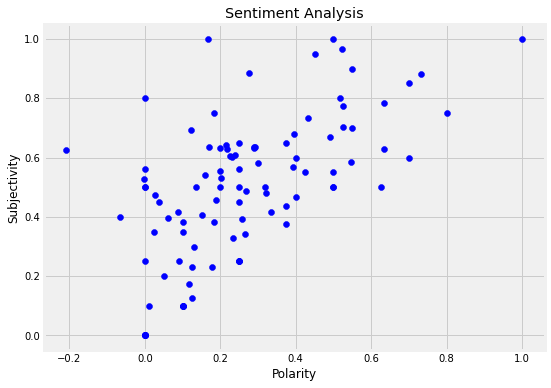

In [29]:
# Plot the polarity and subjectivity

plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [31]:
# Get the percentage of positive tweets

ptweets = df[df['Analysis']=='Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100, 1)

86.0

In [32]:
# Get the percentage of posnegativeitive tweets

ptweets = df[df['Analysis']=='Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100, 1)

3.0

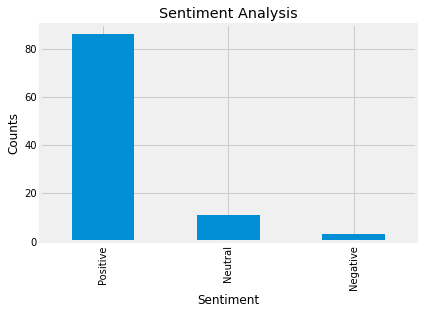

In [36]:
# Show the value counts 
 
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

